In [ ]:
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPool2D,BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model


# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)
# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ln -s /content/drive/My\ Drive/ /mydrive
!ln -s /mydrive/tt /tt
!ls /tt

 archived.zip	     ct.jpg   gt.jpg	      'processed_data (1)'   W
 asl-alphabet-test   del      Input_dataset    Saved_model	     X
 asl_predictor.h5    dt.jpg   J		       space		     Y
 at.jpg		     et.jpg   nothing	       tt		     Z
 bt.jpg		     ft.jpg   processed_data   V


In [ ]:
img_height, img_width = (200,200)
batch_size = 32

train_data_dir = "/tt/processed_data/train"
valid_data_dir = "/tt/processed_data/val"
test_data_dir = "/tt/processed_data/test"

In [ ]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   rotation_range = 10,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.4)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

valid_generator = train_datagen.flow_from_directory(
    valid_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 220 images belonging to 20 classes.
Found 40 images belonging to 20 classes.


In [ ]:
test_generator = train_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_height, img_width),
    batch_size=1,
    class_mode='categorical',
    subset='validation'
)

Found 40 images belonging to 20 classes.


In [ ]:
x,y = test_generator.next()
x.shape

(1, 200, 200, 3)

In [ ]:
base_model = ResNet50(include_top=False, weights='imagenet')
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes,activation='softmax')(x)
model = Model(inputs = base_model.input, outputs=predictions)

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
for layer in base_model.layers:
  layer.trainable = False

model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.fit(train_generator, epochs = 50)

Epoch 1/50
7/7 [==============================] - 74s 6s/step - loss: 3.6784 - accuracy: 0.1364
Epoch 2/50
7/7 [==============================] - 2s 315ms/step - loss: 2.4916 - accuracy: 0.4000
Epoch 3/50
7/7 [==============================] - 2s 316ms/step - loss: 1.3733 - accuracy: 0.5409
Epoch 4/50
7/7 [==============================] - 2s 314ms/step - loss: 0.9005 - accuracy: 0.7455
Epoch 5/50
7/7 [==============================] - 2s 312ms/step - loss: 0.7189 - accuracy: 0.8136
Epoch 6/50
7/7 [==============================] - 2s 313ms/step - loss: 0.4717 - accuracy: 0.8636
Epoch 7/50
7/7 [==============================] - 2s 315ms/step - loss: 0.4104 - accuracy: 0.8818
Epoch 8/50
7/7 [==============================] - 2s 316ms/step - loss: 0.3012 - accuracy: 0.9318
Epoch 9/50
7/7 [==============================] - 2s 320ms/step - loss: 0.2925 - accuracy: 0.9455
Epoch 10/50
7/7 [==============================] - 2s 318ms/step - loss: 0.2155 - accuracy: 0.9364
Epoch 11/50
7/7 [====

In [ ]:
model.save('/mydrive/tt/Saved_model/ResNet50_Alphabet.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
a = '/mydrive/tt/Saved_model/ResNet50_Alphabet.h5'
from keras.models import load_model
a = load_model(a)

In [ ]:
from keras.models import load_model
import cv2
import numpy as np
#model = load_model('/mydrive/Allphabet_dataset/episode/ResNet50_Alphabet.h5')
model = a
ans = "abcdefghiklmnopqrstu"
def Print(classes, ans):
  index = classes.argmax()
  return ans[index]

ac=0
su=0
for elem in 'abcdefghiklmnopqrstu':
  print("real class: {},".format(elem), end = " ")
  img = cv2.imread('/mydrive/handy/' + elem + '.jpg')
  img = cv2.resize(img,(224,224))
  img = np.reshape(img,[1,224,224,3])
  classes = model.predict(img)
  ret = Print(classes,ans)
  print("predict class: {}".format(ret))
  su+=1
  if ret == elem: ac += 1

print("\naccuracy {}".format(ac/su))


real class: a, predict class: p
real class: b, predict class: d
real class: c, predict class: d
real class: d, predict class: d
real class: e, predict class: d
real class: f, predict class: f
real class: g, predict class: g
real class: h, predict class: d
real class: i, predict class: d
real class: k, predict class: d
real class: l, predict class: p
real class: m, predict class: n
real class: n, predict class: p
real class: o, predict class: p
real class: p, predict class: p
real class: q, predict class: p
real class: r, predict class: g
real class: s, predict class: d
real class: t, predict class: p
real class: u, predict class: g

accuracy 0.2


In [ ]:
a = load_model('/mydrive/Allphabet_dataset/Saved_model/ResNet50_AlphabetE6.h5')

In [ ]:
predictions = a.output
model = Model(inputs = a.input, outputs=predictions)

for layer in a.layers:
  layer.trainable = False

model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.fit(train_generator, epochs = 50)

Epoch 1/50
7/7 [==============================] - 5s 319ms/step - loss: 4.3408 - accuracy: 0.1955
Epoch 2/50
7/7 [==============================] - 2s 316ms/step - loss: 4.2156 - accuracy: 0.2409
Epoch 3/50
7/7 [==============================] - 2s 316ms/step - loss: 4.3913 - accuracy: 0.2136
Epoch 4/50
7/7 [==============================] - 2s 312ms/step - loss: 4.0933 - accuracy: 0.2318
Epoch 5/50
7/7 [==============================] - 2s 317ms/step - loss: 4.1677 - accuracy: 0.2318
Epoch 6/50
7/7 [==============================] - 2s 312ms/step - loss: 4.1430 - accuracy: 0.2227
Epoch 7/50
7/7 [==============================] - 2s 317ms/step - loss: 4.3568 - accuracy: 0.2318
Epoch 8/50
7/7 [==============================] - 2s 315ms/step - loss: 4.2376 - accuracy: 0.2409
Epoch 9/50
7/7 [==============================] - 2s 315ms/step - loss: 4.2457 - accuracy: 0.2773
Epoch 10/50
7/7 [==============================] - 2s 314ms/step - loss: 4.2355 - accuracy: 0.2409
Epoch 11/50
7/7 [==

In [ ]:
model.save('/mydrive/tt/Saved_model/ResNet50_AlphabetE6F50.h5')

KeyError: ignored

In [ ]:
b = load_model('/mydrive/tt/Saved_model/ResNet50_AlphabetE6F50.h5')

In [ ]:
from keras.models import load_model
import cv2
import numpy as np
#model = load_model('/mydrive/Allphabet_dataset/episode/ResNet50_Alphabet.h5')
#model=b
ans = "abcdefghiklmnopqrstu"
def Print(classes, ans):
  index = classes.argmax()
  return ans[index]

ac=0
su=0
for elem in 'abcdefghiklmnopqrstu':
  print("real class: {},".format(elem), end = " ")
  img = cv2.imread('/mydrive/handy/' + elem + '.jpg')
  img = cv2.resize(img,(224,224))
  img = np.reshape(img,[1,224,224,3])
  classes = model.predict(img)
  ret = Print(classes,ans)
  print("predict class: {}".format(ret))
  su+=1
  if ret == elem: ac += 1

print("\naccuracy {}".format(ac/su))


real class: a, predict class: s
real class: b, predict class: o
real class: c, predict class: c
real class: d, predict class: d
real class: e, predict class: s
real class: f, predict class: f
real class: g, predict class: g
real class: h, predict class: f
real class: i, predict class: i
real class: k, predict class: o
real class: l, predict class: t
real class: m, predict class: m
real class: n, predict class: m
real class: o, predict class: o
real class: p, predict class: c
real class: q, predict class: c
real class: r, predict class: e
real class: s, predict class: s
real class: t, predict class: o
real class: u, predict class: o

accuracy 0.4


In [ ]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Total params: 25,706,388
Trainable params: 0
Non-trainable params: 25,706,388
__________________________________________________________________________________________________


In [ ]:
model.save('/mydrive')

KeyError: ignored

In [ ]:
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print("\nTest accuracy: ",test_acc)

40/40 - 14s - loss: 6.0490 - accuracy: 0.1500

Test accuracy:  0.15000000596046448


In [ ]:
!ls /mydrive

 경영과학		   handy
 고양이물리학		   IE414_Assignment2_2021_pub.pdf
'과제06&07.pdf'		   IE414_Chap10_v1-2_s.pdf
'10-1. 반도체란.pdf'	   IE414_Chap10_v3_s.pdf
'12-1. 반도체란.pdf'	   IE414_Chap10_v4_s.pdf
'12. 현미경의 발전.pdf'    IE414_Chap12_v1_s.pdf
'13. 물질의 발전.pdf'	   IE414_Chap7_v2_s.pdf
 경과2			   images
'기계 학습_7장_ver1.pdf'   images.txt
'기계 학습_8장.pdf'	   ML
'기계 학습_9장_ver2.pdf'  'My Drive'
 A.jpg			   실습p10_treeTraversal_n_Queens.ppt
 algorithm		   실습p11_sumOFsubsets_m_coloring.ppt
 Allphabet_dataset	   실습p12_BB.ppt
 Alphabet_dataset	   실습p13_sorting.ppt
 B.jpg			   실습p14_searching1.ppt
 C.jpg			   실습p15_searching2.ppt
 Classroom		   paper
'Colab Notebooks'	   pqrs
 data			   RealTimeObjectDetection
 D.jpg			   testes.jpg
 E.jpg			   testesTP.jpg
 FinancialEngineering	   tt
 F.jpg			   ybm
'제목 없는 문서.gdoc'	   YOLOClassification.ipynb
 G.jpg			   yolov4
 hand


In [ ]:
fonk = load_model('/mydrive/tt/asl_predictor.h5')

In [ ]:
type(fonk)

keras.engine.sequential.Sequential

In [ ]:
fonk.predict_classes

In [ ]:
from keras.models import load_model
import cv2
import numpy as np
model = fonk
ans = "abcdefghiklmnopqrstu"
def Print(classes, ans):
  index = classes.argmax()
  return ans[index]

ac=0
su=0
for elem in 'abcdefghiklmnopqrstu':
  print("real class: {},".format(elem), end = " ")
  img = cv2.imread('/mydrive/handy/' + elem + '.jpg')
  img = cv2.resize(img,(224,224))
  img = np.reshape(img,[1,224,224,3])
  classes = model.predictclasses(img)
  ret = Print(classes,ans)
  print("predict class: {}".format(ret))
  su+=1
  if ret == elem: ac += 1

print("\naccuracy {}".format(ac/su))


real class: a, 

AttributeError: ignored

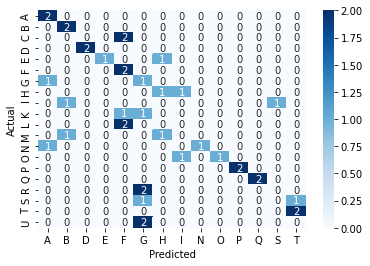

test accuracy : 12.5


In [ ]:
import pandas as pd
import seaborn as sn
import tensorflow as tf

#model = tf.keras.models.load_model('tt/Saved_model/ResNet50_Alphabet.h5')
filenames = test_generator.filenames
nb_samples = len(test_generator)
y_prob=[]
y_act=[]
test_generator.reset()
for _ in range(nb_samples):
  X_test,Y_test = test_generator.next()
  y_prob.append(model.predict(X_test))
  y_act.append(Y_test)

predicted_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_prob]
actual_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_act]

out_df = pd.DataFrame(np.vstack([predicted_class,actual_class]).T,columns=['predicted_class','actual_class'])
confusion_matrix = pd.crosstab(out_df['actual_class'],out_df['predicted_class'],rownames=['Actual'],colnames=['Predicted'])

sn.heatmap(confusion_matrix,cmap='Blues', annot=True, fmt='d')
plt.show()
print('test accuracy : {}'.format((np.diagonal(confusion_matrix).sum()/confusion_matrix.sum().sum()*100)))

In [ ]:
# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

In [ ]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("on")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

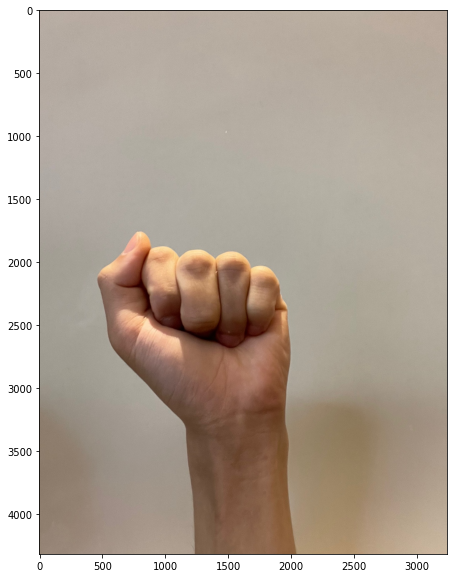

In [ ]:
 imShow('/mydrive/handy/a.jpg')

In [ ]:
from keras.models import load_model
import cv2
import numpy as np
#model = load_model('/mydrive/Allphabet_dataset/episode/ResNet50_Alphabet.h5')
ans = "abcdefghiklmnopqrstu"
def Print(classes, ans):
  index = classes.argmax()
  return ans[index]

ac=0
su=0
for elem in 'abcdefghiklmnopqrstu':
  print("real class: {},".format(elem), end = " ")
  img = cv2.imread('/mydrive/handy/' + elem + '.jpg')
  img = cv2.resize(img,(224,224))
  img = np.reshape(img,[1,224,224,3])
  classes = model.predict(img)
  ret = Print(classes,ans)
  print("predict class: {}".format(ret))
  su+=1
  if ret == elem: ac += 1

print("\naccuracy {}".format(ac/su))


real class: a, predict class: s
real class: b, predict class: s
real class: c, predict class: s
real class: d, predict class: s
real class: e, predict class: s
real class: f, predict class: s
real class: g, predict class: s
real class: h, predict class: s
real class: i, predict class: s
real class: k, predict class: s
real class: l, predict class: s
real class: m, predict class: s
real class: n, predict class: s
real class: o, predict class: s
real class: p, predict class: s
real class: q, predict class: s
real class: r, predict class: s
real class: s, predict class: s
real class: t, predict class: s
real class: u, predict class: s

accuracy 0.05


In [ ]:
from keras.models import load_model
import cv2
import numpy as np
model = load_model('Allphabet_dataset/Saved_model/ResNet50_Alphabet.h5')

img = cv2.imread('/mydrive/tt/bt.jpg')
img = cv2.resize(img,(224,224))
img = np.reshape(img,[1,224,224,3])
classes = model.predict(img)
ans = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O"]

def Print(classes, ans):
  index = classes.argmax()
  return ans[index]

Print(classes,ans)

'B'